# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Create DataFrame with newly aquired weather data


In [3]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_list = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
i = 0
found = True

for city in cities:
    response = requests.get(base_url + city).json()
    try:
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except:
        print(f"City not found | {city.title()}")
        i = i + 1
        found = False
    if found == True:
        i = i + 1
        print(f"Processing Record {i} | {city.title()}")
    found = True

Processing Record 1 | Jiaojiang
Processing Record 2 | Punta Arenas
Processing Record 3 | Cayenne
Processing Record 4 | Busselton
Processing Record 5 | Honiara
Processing Record 6 | Lufilufi
Processing Record 7 | Barrow
Processing Record 8 | Bluff
Processing Record 9 | Kysyl-Syr
Processing Record 10 | Ushuaia
Processing Record 11 | Ornskoldsvik
Processing Record 12 | Ribeira Grande
Processing Record 13 | Kodiak
Processing Record 14 | Kavaratti
Processing Record 15 | Taltal
City not found | Bolungarvik
Processing Record 17 | Castro
Processing Record 18 | Hobart
Processing Record 19 | Cidreira
Processing Record 20 | Mataura
Processing Record 21 | Saskylakh
Processing Record 22 | Presidencia Roque Saenz Pena
Processing Record 23 | Rikitea
City not found | Ust-Kamchatsk
Processing Record 25 | Egvekinot
Processing Record 26 | Umm Kaddadah
Processing Record 27 | Albany
Processing Record 28 | Vao
Processing Record 29 | Eyl
Processing Record 30 | Shaoyang
Processing Record 31 | Bethel
Processin

Processing Record 254 | Thinadhoo
Processing Record 255 | Ilulissat
Processing Record 256 | Langham
Processing Record 257 | Marrakesh
Processing Record 258 | Camopi
Processing Record 259 | Namibe
Processing Record 260 | Nome
Processing Record 261 | Margate
Processing Record 262 | Longonjo
Processing Record 263 | La Llanada
Processing Record 264 | Changji
Processing Record 265 | Torbay
Processing Record 266 | Fortuna
Processing Record 267 | Palmer
City not found | Yanan
Processing Record 269 | Chicama
Processing Record 270 | At-Bashi
City not found | Vaitupu
Processing Record 272 | Mogadishu
Processing Record 273 | Mountain Home
City not found | Gumushane
Processing Record 275 | Hambantota
Processing Record 276 | Uvat
Processing Record 277 | Cotonou
Processing Record 278 | Guider
Processing Record 279 | Jiwani
Processing Record 280 | Avarua
Processing Record 281 | Port-Gentil
Processing Record 282 | Naifaru
Processing Record 283 | Gourcy
Processing Record 284 | Sabang
Processing Record 

Processing Record 507 | Corinth
City not found | Karaul
Processing Record 509 | Makaha
Processing Record 510 | Paracuru
Processing Record 511 | Draguignan
Processing Record 512 | Lashio
Processing Record 513 | Maksatikha
Processing Record 514 | Istanbul
Processing Record 515 | Aykino
Processing Record 516 | Talara
Processing Record 517 | Labelle
City not found | Stoyba
Processing Record 519 | Nelson Bay
Processing Record 520 | Imbituba
Processing Record 521 | Oranjemund
Processing Record 522 | Port Shepstone
Processing Record 523 | Muros
Processing Record 524 | Aconibe
City not found | Grand River South East
Processing Record 526 | Hamilton
Processing Record 527 | Buin
Processing Record 528 | Iralaya
Processing Record 529 | Ellisras
Processing Record 530 | Dudinka
Processing Record 531 | Camana
Processing Record 532 | Safaga
Processing Record 533 | Lunglei
Processing Record 534 | Beringovskiy
Processing Record 535 | Venado Tuerto
Processing Record 536 | Brokopondo
Processing Record 537

In [4]:
data = {
    "City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}
df = pd.DataFrame(data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jiaojiang,28.68,121.44,73.00,73,84,9.06,CN,1598894576
1,Punta Arenas,-53.15,-70.92,44.60,65,40,19.46,CL,1598894577
2,Cayenne,4.93,-52.33,89.60,59,75,8.05,GF,1598894577
3,Busselton,-33.65,115.33,54.00,98,84,19.26,AU,1598894053
4,Honiara,-9.43,159.95,79.07,80,31,6.62,SB,1598894124


### Export the city data into a .csv file.
* Display the new dataframe's count for comparison with the length of cities list

In [ ]:
df.to_html()

In [22]:
df.to_csv("/Users/loganbon/Documents/GitHub/databootcamp/work_here/11-Web/web-design-challenge/Resources/cities.csv")
df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
* No cities have humidity > 100%

In [6]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.680236,19.053085,68.960054,68.851180,50.526316,8.775136,1.598895e+09
std,32.499108,88.304226,14.917542,20.541922,37.301605,6.403579,1.218959e+02
min,-54.800000,-179.170000,32.920000,4.000000,0.000000,0.310000,1.598894e+09
25%,-3.890000,-60.815000,55.940000,57.000000,12.000000,4.470000,1.598895e+09
50%,22.930000,25.570000,72.000000,74.000000,50.000000,7.850000,1.598895e+09
75%,46.610000,95.725000,79.780000,83.000000,89.000000,11.410000,1.598895e+09
max,78.220000,179.320000,104.740000,100.000000,100.000000,52.720000,1.598895e+09


## Latitude vs. Temperature Plot

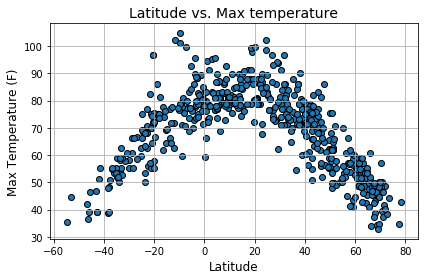

In [7]:
# plt.figure(figsize=(7,7))
plt.scatter(df["Lat"],df["Max Temp"],edgecolors="black")
plt.title("Latitude vs. Max temperature",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("/Users/loganbon/Documents/GitHub/databootcamp/work_here/11-Web/web-design-challenge/WebVisualizations/assets/visualizations/figure_1.png")

**Code Breakdown:** This code plots Latitude vs. Max Temperature (on 7/26/2020) for the entire population of randomly selected cities <br>
**Figure Analysis:** As latitude nears it's max and min values, temperature nears it's lowest value.

## Latitude vs. Humidity Plot

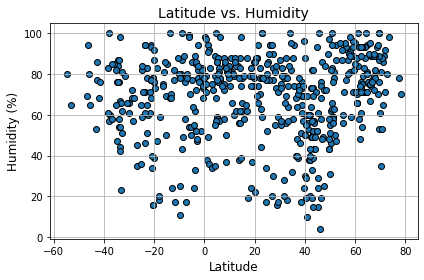

In [8]:
# plt.figure(figsize=(7,7))
plt.scatter(df["Lat"],df["Humidity"],edgecolors="black")
plt.title("Latitude vs. Humidity",size=14)
plt.ylabel("Humidity (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("/Users/loganbon/Documents/GitHub/databootcamp/work_here/11-Web/web-design-challenge/WebVisualizations/assets/visualizations/figure_2.png")

**Code Breakdown:** This code plots Latitude vs. Humidity (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Humidity.

## Latitude vs. Cloudiness Plot

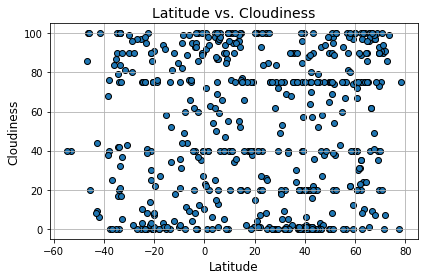

In [9]:
# plt.figure(figsize=(7,7))
plt.scatter(df["Lat"],df["Cloudiness"],edgecolors="black")
plt.title("Latitude vs. Cloudiness",size=14)
plt.ylabel("Cloudiness",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("/Users/loganbon/Documents/GitHub/databootcamp/work_here/11-Web/web-design-challenge/WebVisualizations/assets/visualizations/figure_3.png")

**Code Breakdown:** This code plots Latitude vs. Cloudiness (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Cloudiness.

## Latitude vs. Wind Speed Plot

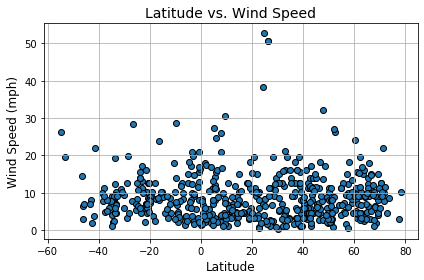

In [10]:
# plt.figure(figsize=(7,7))
plt.scatter(df["Lat"],df["Wind Speed"],edgecolors="black")
plt.title("Latitude vs. Wind Speed",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("/Users/loganbon/Documents/GitHub/databootcamp/work_here/11-Web/web-design-challenge/WebVisualizations/assets/visualizations/figure_4.png")

**Code Breakdown:** This code plots Latitude vs. Wind Speed (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Wind Speed. An outlier city was experiencing extremely high wind at time of review.

## Linear Regression

In [11]:
# Creating a function to create Linear Regression plots
def plot_lin(x, y):
    slope, intercept, rvalue, pvalue, std = linregress(x,y)
    line = (slope * x) + intercept
    plt.plot(x,line, linewidth=3,color="r")
    print(f"The r-squared is: {rvalue}")

In [12]:
# Creating Northern and Southern Hemisphere DataFrames
north_df = df.loc[df["Lat"]>0,:]
south_df = df.loc[df["Lat"]<=0,:]

print(len(north_df))
print(len(south_df))
north_df.head()

390
161


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jiaojiang,28.68,121.44,73.00,73,84,9.06,CN,1598894576
2,Cayenne,4.93,-52.33,89.60,59,75,8.05,GF,1598894577
6,Barrow,71.29,-156.79,37.40,86,90,21.92,US,1598893937
8,Kysyl-Syr,63.90,122.76,50.65,88,100,2.35,RU,1598894579
10,Örnsköldsvik,63.29,18.72,57.20,71,24,3.36,SE,1598894580


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8191155445490713


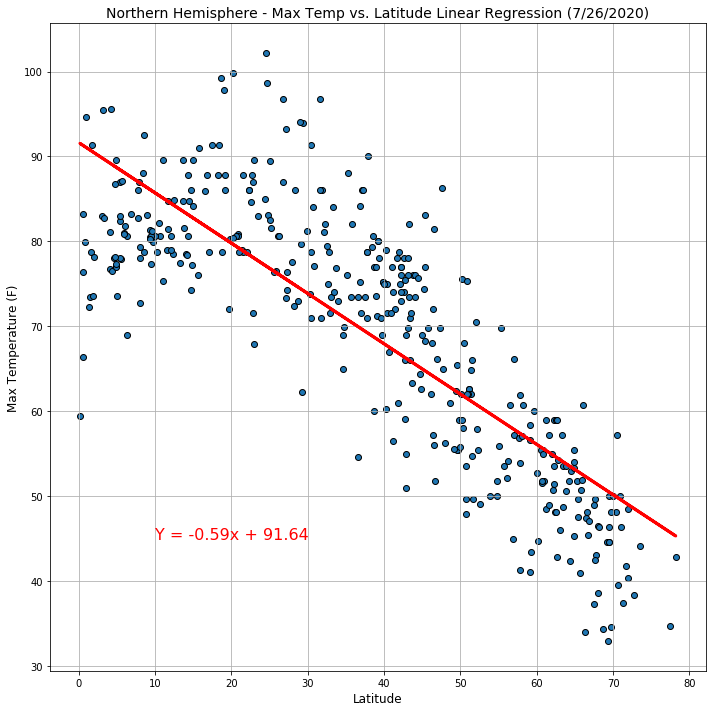

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(north_df["Lat"],north_df["Max Temp"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Max Temp"])
values = linregress(north_df["Lat"],north_df["Max Temp"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(10,45),color="r",size=16)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Temp Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8246902699121044


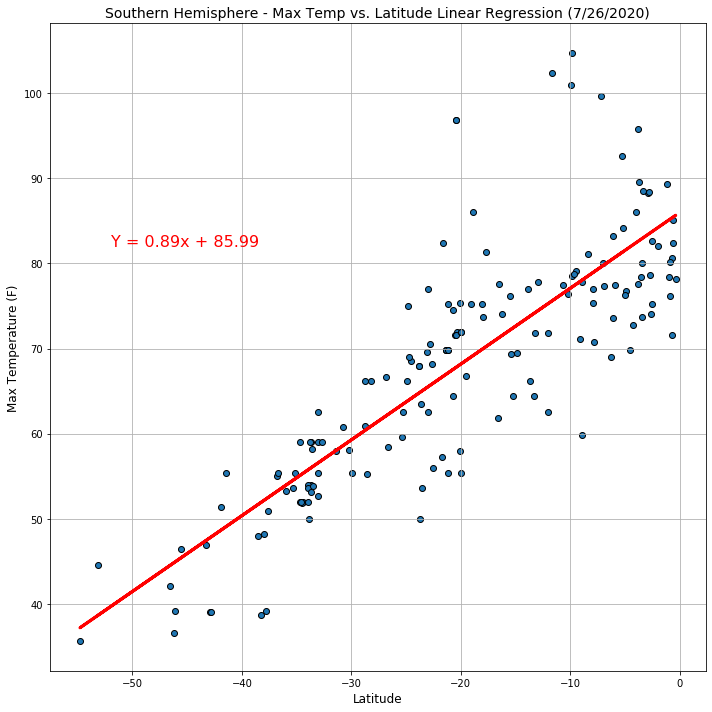

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(south_df["Lat"],south_df["Max Temp"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Max Temp"])
values = linregress(south_df["Lat"],south_df["Max Temp"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-52,82),color="r",size=16)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Temp Linear Regression.png")

**Analysis**: Using Latitude to predict temperature in the Southern Hemisphere will provide a more accurate result than predicting temperature in the Northern Hemisphere. On average, as Latitude nears zero, temperatures move higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05888248009125667


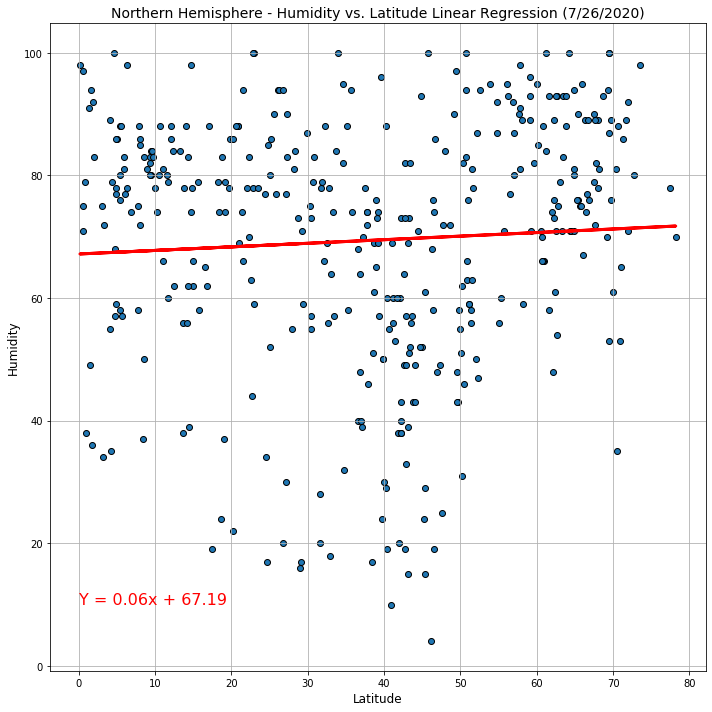

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(north_df["Lat"],north_df["Humidity"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Humidity"])
values = linregress(north_df["Lat"],north_df["Humidity"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(0,10),color="r",size=16)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Humidity",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Humidity Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.025549267962516456


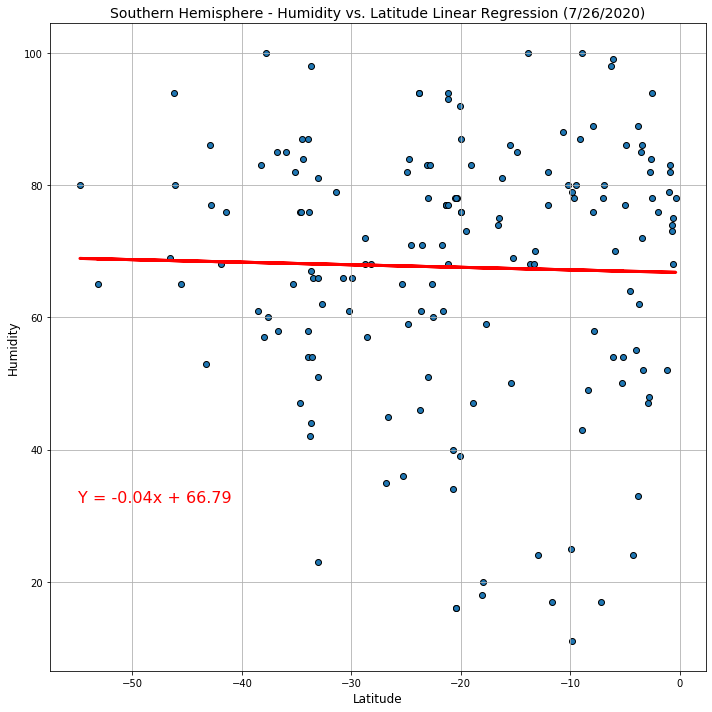

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(south_df["Lat"],south_df["Humidity"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Humidity"])
values = linregress(south_df["Lat"],south_df["Humidity"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,32),color="r",size=16)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Humidity",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Humidity Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Humidity. It is safe to conclude the two variables are not correlated. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022981039765186687


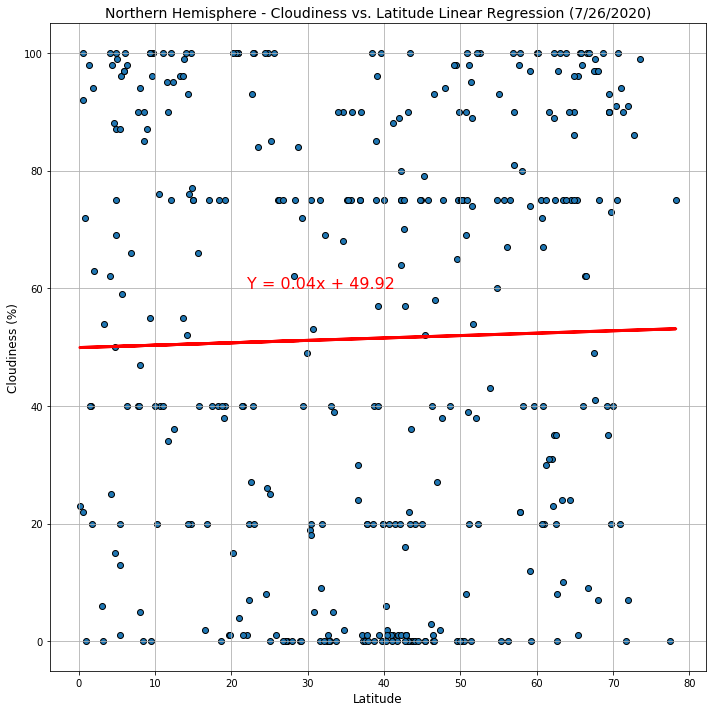

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(north_df["Lat"],north_df["Cloudiness"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Cloudiness"])
values = linregress(north_df["Lat"],north_df["Cloudiness"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(22,60),color="r",size=16)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Cloudiness (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Cloudiness Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.00590213354835851


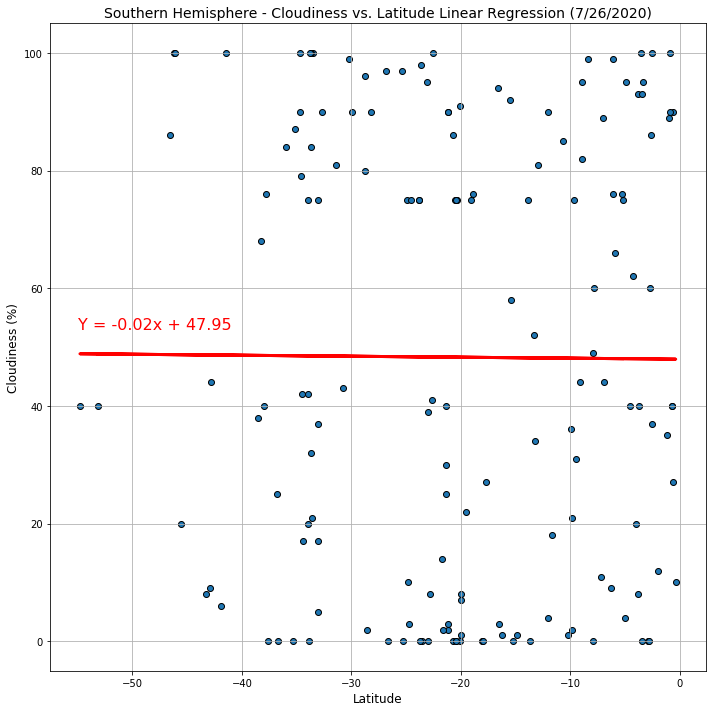

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(south_df["Lat"],south_df["Cloudiness"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Cloudiness"])
values = linregress(south_df["Lat"],south_df["Cloudiness"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,53),color="r",size=16)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Cloudiness (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Cloudiness Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Cloudiness. The two variables have a very low correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007527884793549303


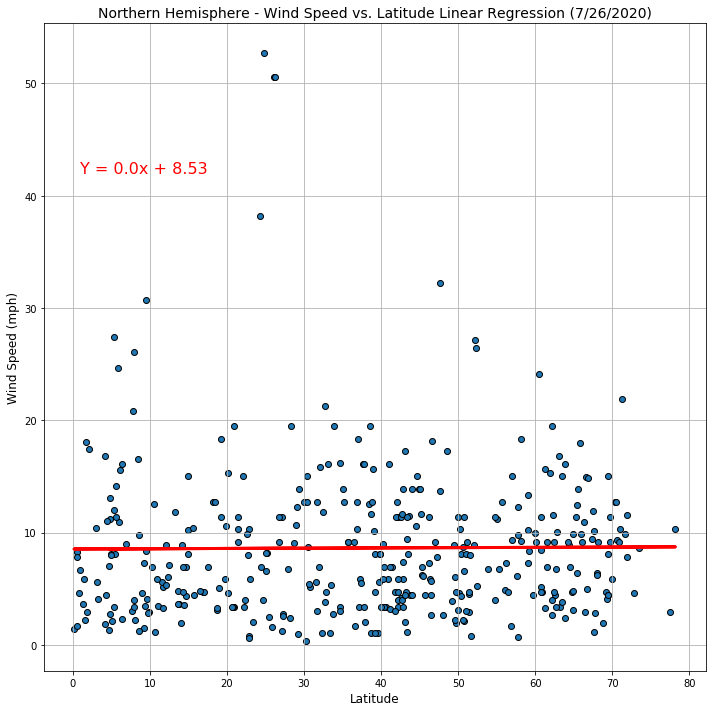

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(north_df["Lat"],north_df["Wind Speed"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Wind Speed"])
values = linregress(north_df["Lat"],north_df["Wind Speed"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(1,42),color="r",size=16)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Wind Speed Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022255751978676627


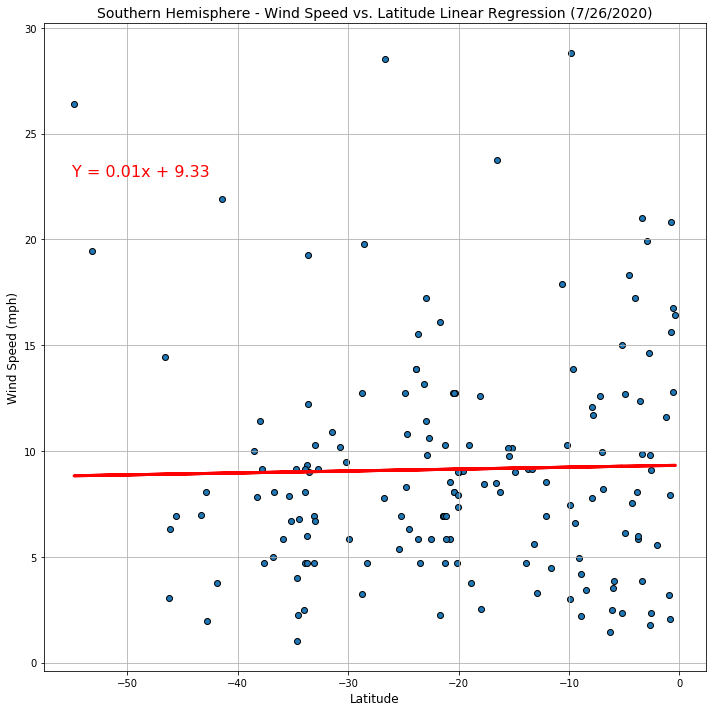

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(south_df["Lat"],south_df["Wind Speed"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Wind Speed"])
values = linregress(south_df["Lat"],south_df["Wind Speed"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,23),color="r",size=16)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
# plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Wind Speed Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Wind Speed. The two variables have a very low correlation.